<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [16]:
data = pd.read_csv('/Users/sebastianbrockschmidt/Desktop/quest_portfolio/asset_price_data.csv')

In [17]:
df = data.copy()

In [18]:
df = df.interpolate(method='linear', limit_direction='both')

In [20]:
df.shape

(783, 6)

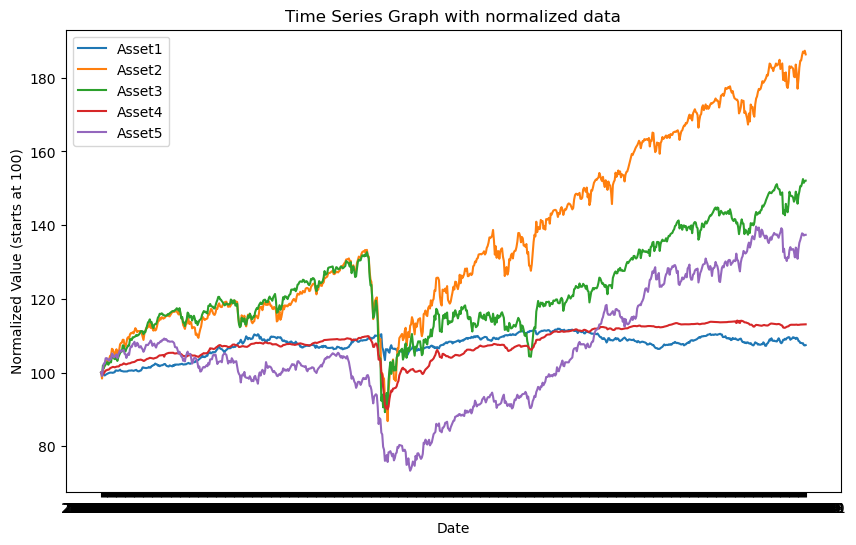

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df_normiert = df.drop(columns=['date']).div(df.drop(columns=['date']).iloc[0]).mul(100)

df_normiert.set_index(df['date'], inplace=True)

plt.figure(figsize=(10, 6))

for spalte in df_normiert.columns:
    plt.plot(df_normiert.index, df_normiert[spalte], label=spalte)


plt.xlabel('Date')
plt.ylabel('Normalized Value (starts at 100)')
plt.title('Time Series Graph with normalized data')
plt.legend()

plt.show()


<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [23]:
df_pct_change = pd.DataFrame()

df_pct_change['date'] = df['date']

for spalte in ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']:
    df_pct_change[spalte + '_daily_pct_change'] = df[spalte].pct_change() * 100

In [26]:
df_pct_change

,date,Asset1_daily_pct_change,Asset2_daily_pct_change,Asset3_daily_pct_change,Asset4_daily_pct_change,Asset5_daily_pct_change
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...,...
778,2021-12-27,-0.091306,0.738415,0.543901,0.005841,0.667672
779,2021-12-28,0.006442,0.548309,0.759918,0.005841,-0.114106
780,2021-12-29,-0.486243,-0.158812,-0.664707,0.005840,-0.314151
781,2021-12-30,-0.069556,0.290341,0.334577,0.026280,0.143246


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [29]:
df_pct_change_no_date = df_pct_change.drop(columns=['date'])

# Korrelationsmatrix erstellen
korrelationsmatrix = df_pct_change_no_date.corr()
korrelationsmatrix

,Asset1_daily_pct_change,Asset2_daily_pct_change,Asset3_daily_pct_change,Asset4_daily_pct_change,Asset5_daily_pct_change
Asset1_daily_pct_change,1.000000,-0.089023,-0.062727,0.107833,-0.108488
Asset2_daily_pct_change,-0.089023,1.000000,0.852473,0.531493,0.591387
Asset3_daily_pct_change,-0.062727,0.852473,1.000000,0.516387,0.557544
Asset4_daily_pct_change,0.107833,0.531493,0.516387,1.000000,0.429011
Asset5_daily_pct_change,-0.108488,0.591387,0.557544,0.429011,1.000000


<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

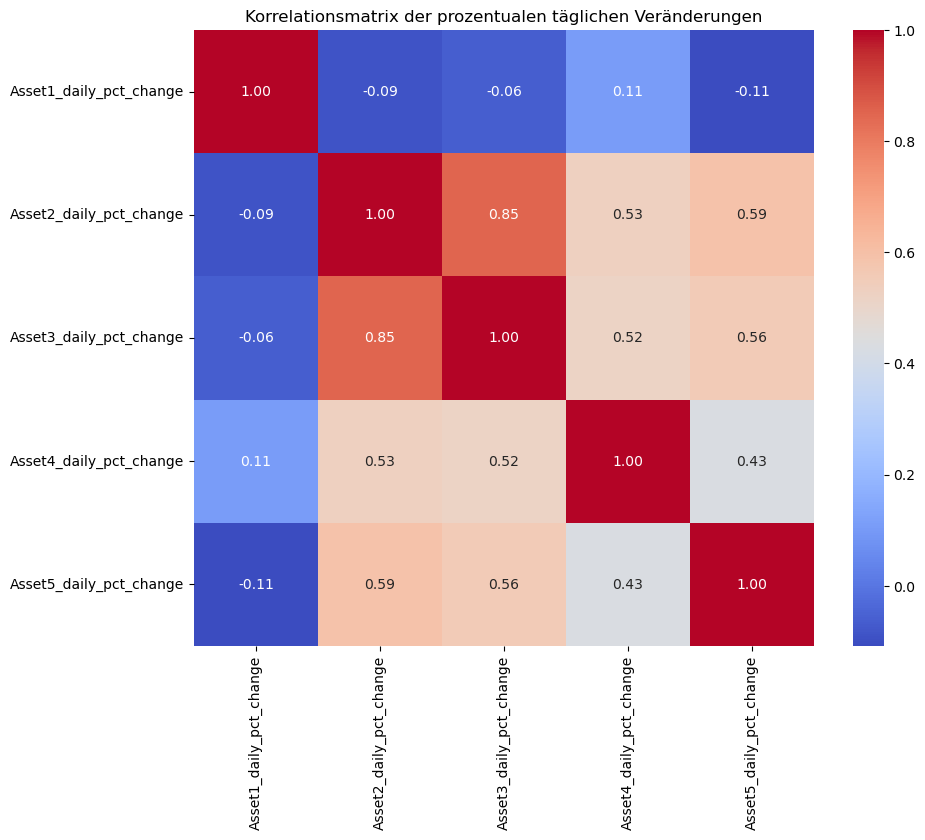

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(korrelationsmatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der prozentualen täglichen Veränderungen')
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [33]:
data2 = pd.read_csv('/Users/sebastianbrockschmidt/Desktop/quest_portfolio/portfolio_weights.csv')

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [34]:
data2

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [35]:
df_2 = data2.copy()

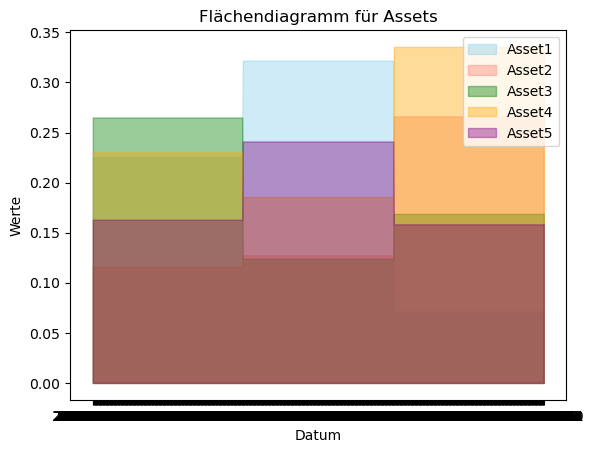

In [37]:
x = df_2['date']

y1 = df_2['Asset1']
y2 = df_2['Asset2']
y3 = df_2['Asset3']
y4 = df_2['Asset4']
y5 = df_2['Asset5']

plt.fill_between(x, y1, color="skyblue", alpha=0.4, label='Asset1')
plt.fill_between(x, y2, color="salmon", alpha=0.4, label='Asset2')
plt.fill_between(x, y3, color="green", alpha=0.4, label='Asset3')
plt.fill_between(x, y4, color="orange", alpha=0.4, label='Asset4')
plt.fill_between(x, y5, color="purple", alpha=0.4, label='Asset5')

plt.xlabel('Datum')
plt.ylabel('Werte')
plt.title('Flächendiagramm für Assets')
plt.legend()

plt.show()


<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [47]:
df.dtypes

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [57]:
# Assuming df is your DataFrame and you want to get the row where the column 'column_name' has the value 'specific_value'


date1a = df[df['date'] == '2019-01-02']
date1b = df[df['date'] == '2019-12-31']
date2a = df[df['date'] == '2020-01-02']
date2b = df[df['date'] == '2020-12-31']
date3a = df[df['date'] == '2021-01-04']
date3b = df[df['date'] == '2021-12-31']


,date,Asset1,Asset2,Asset3,Asset4,Asset5
782,2021-12-31,248.7545,104.106,39.005,342.59,69.91


In [58]:
date1a = df.drop('date', axis=1)
date1b = df.drop('date', axis=1)
date2a = df.drop('date', axis=1)
date2b = df.drop('date', axis=1)


In [48]:
df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,342.42,70.11
779,2021-12-28,249.9368,104.526,39.115000,342.44,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [63]:
data3 = pd.read_csv('/Users/sebastianbrockschmidt/Desktop/quest_portfolio/asset_information_data.csv')
df_sorted = data3.sort_values(by='Family')
df_sorted

,Name,Family
4,Asset5,Alternative
2,Asset3,Equity
3,Asset4,Equity
0,Asset1,Fixed Income
1,Asset2,Fixed Income


In [77]:
data2['Alternative'] = data2['Asset5']

In [81]:
data2['Equity'] = data2['Asset3'] + data2['Asset4']

In [82]:
data2['Fixed Income'] = data2['Asset1'] + data2['Asset2']

In [83]:
data2

,date,Asset1,Asset2,Asset3,Asset4,Asset5,Alternative,Fixed Income,Equity
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974,0.162974,0.341713,0.495313
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974,0.162974,0.341713,0.495313
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974,0.162974,0.341713,0.495313
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974,0.162974,0.341713,0.495313
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974,0.162974,0.341713,0.495313
...,...,...,...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356,0.158356,0.337400,0.504245
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356,0.158356,0.337400,0.504245
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356,0.158356,0.337400,0.504245
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356,0.158356,0.337400,0.504245


In [84]:
df_modified = data2.drop(['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], axis=1)

In [85]:
df_modified

,date,Alternative,Fixed Income,Equity
0,2019-01-02,0.162974,0.341713,0.495313
1,2019-01-03,0.162974,0.341713,0.495313
2,2019-01-04,0.162974,0.341713,0.495313
3,2019-01-07,0.162974,0.341713,0.495313
4,2019-01-08,0.162974,0.341713,0.495313
...,...,...,...,...
778,2021-12-27,0.158356,0.337400,0.504245
779,2021-12-28,0.158356,0.337400,0.504245
780,2021-12-29,0.158356,0.337400,0.504245
781,2021-12-30,0.158356,0.337400,0.504245


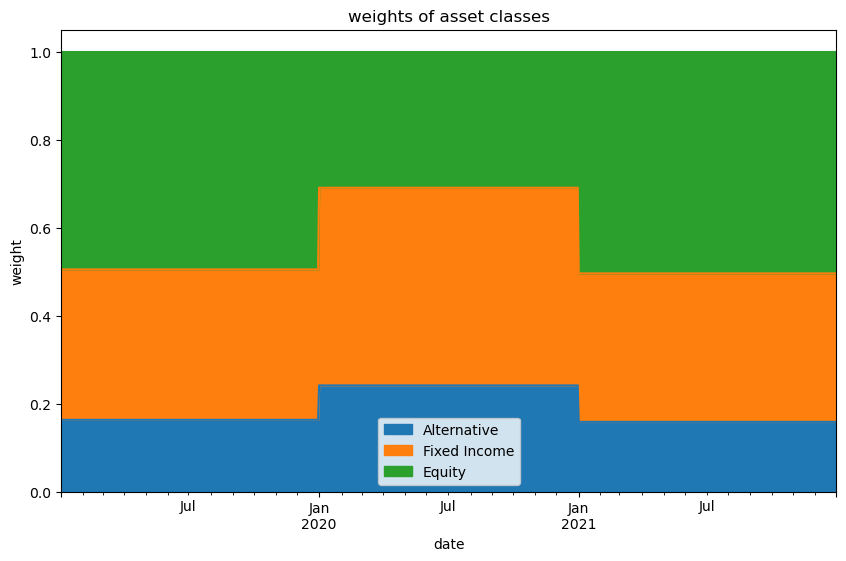

In [102]:

df_modified.plot(kind='area', figsize=(10, 6))


plt.xlabel('date')
plt.ylabel('weight')
plt.title('weights of asset classes')


plt.show()